<h2> Dataset 
<h2> https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data 

<h1> Exploratory Data Analysis

In [1]:
#Import necessary libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#load csv file as a dataframe with pandas

df = pd.read_csv('apple_quality.csv')

In [3]:
#check the dataframe

df

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
0                          -0.491590483    good  
1                          -0.722809367    good  
2                           2.621636473     bad  
3                           0.790723217    good  
4                           0.501984036    good  
...                                 ...     ...  
3996                        1.854235285    good  
3997                       -1.334611391     bad  
3998                       -2.229719806    good  
3999                        1.599796456    good  
4000  Created_by_Nidula_Elgiriyewithana     NaN  

[4001 rows x 9 columns]

In [4]:
#drop the unnecessary row

df = df.drop(df.index[-1])

In [5]:
#dataframe details for types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
#Convert the column into the right data type

df["Acidity"] = df["Acidity"].astype("float")

In [7]:
#Convert categorical values into numeric values 

df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})

In [8]:
#Remove unnecessary column

df.drop(columns = ["A_id"], inplace = True)

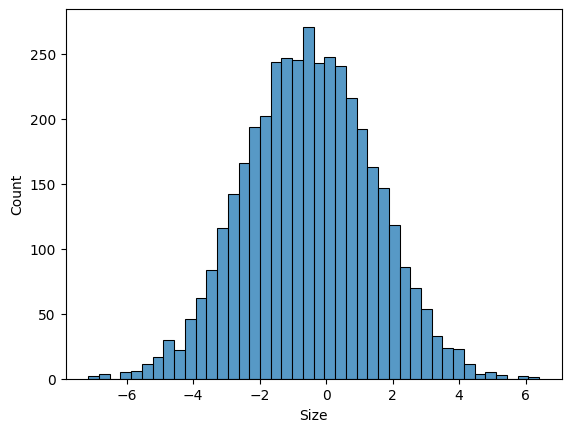

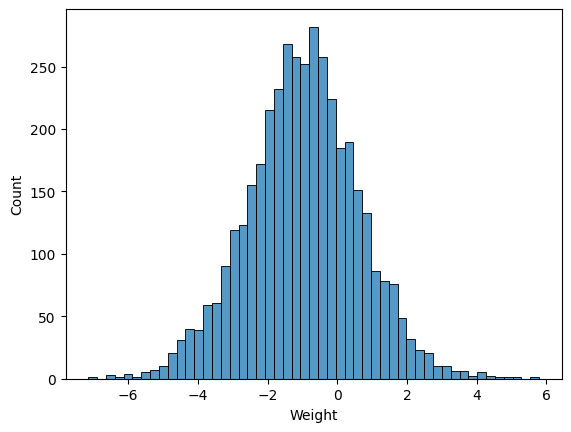

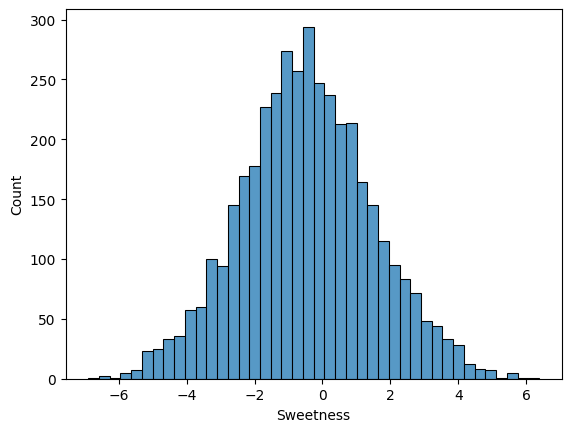

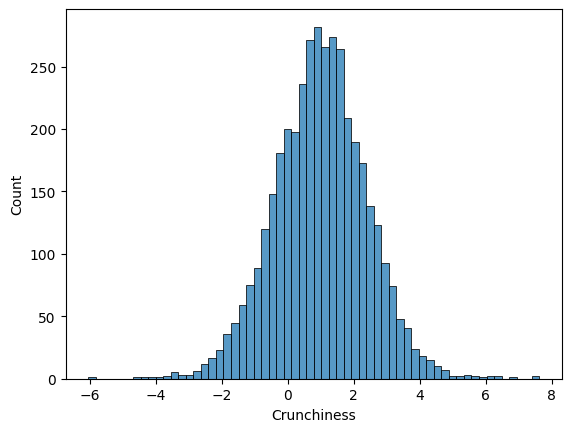

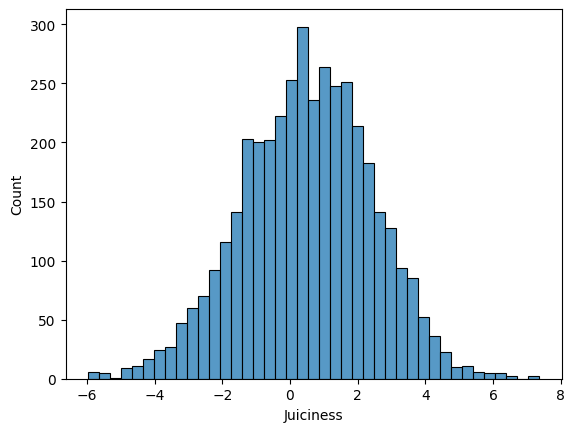

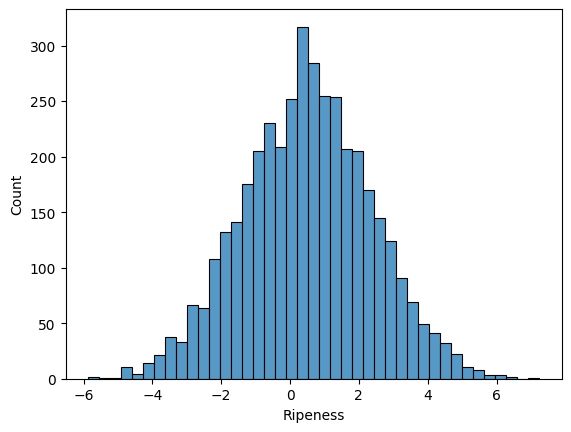

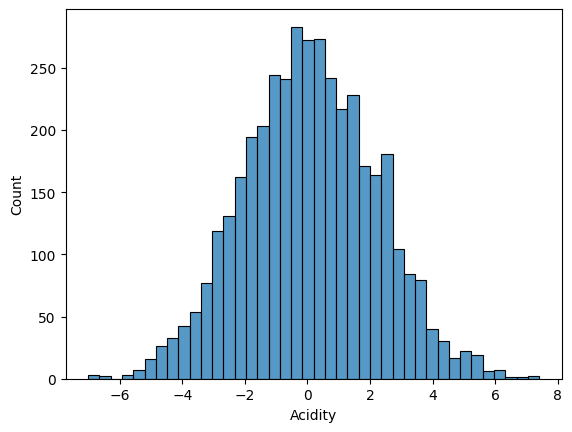

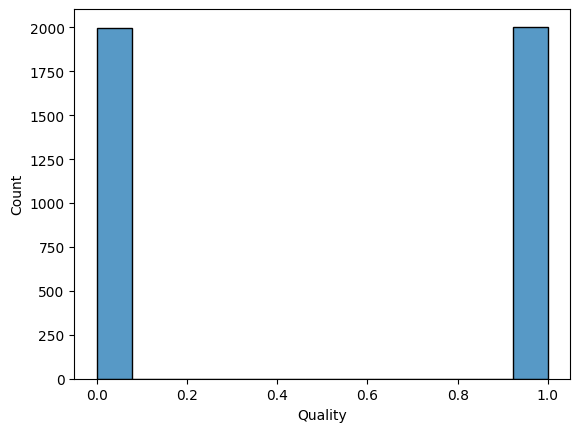

In [9]:
#Visualize value distribution in each column with histogram

for col in df.columns:
    sns.histplot(df[col])
    plt.show()

In [10]:
#Statistical Summary of Numeric Columns

df.describe()

Size       Weight    Sweetness  Crunchiness    Juiciness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     -0.503015    -0.989547    -0.470479     0.985478     0.512118   
std       1.928059     1.602507     1.943441     1.402757     1.930286   
min      -7.151703    -7.149848    -6.894485    -6.055058    -5.961897   
25%      -1.816765    -2.011770    -1.738425     0.062764    -0.801286   
50%      -0.513703    -0.984736    -0.504758     0.998249     0.534219   
75%       0.805526     0.030976     0.801922     1.894234     1.835976   
max       6.406367     5.790714     6.374916     7.619852     7.364403   

          Ripeness      Acidity      Quality  
count  4000.000000  4000.000000  4000.000000  
mean      0.498277     0.076877     0.501000  
std       1.874427     2.110270     0.500062  
min      -5.864599    -7.010538     0.000000  
25%      -0.771677    -1.377424     0.000000  
50%       0.503445     0.022609     1.000000  
75%       1.766212     1.510493     1.000000  
max       7.237837     7.404736     1.000000

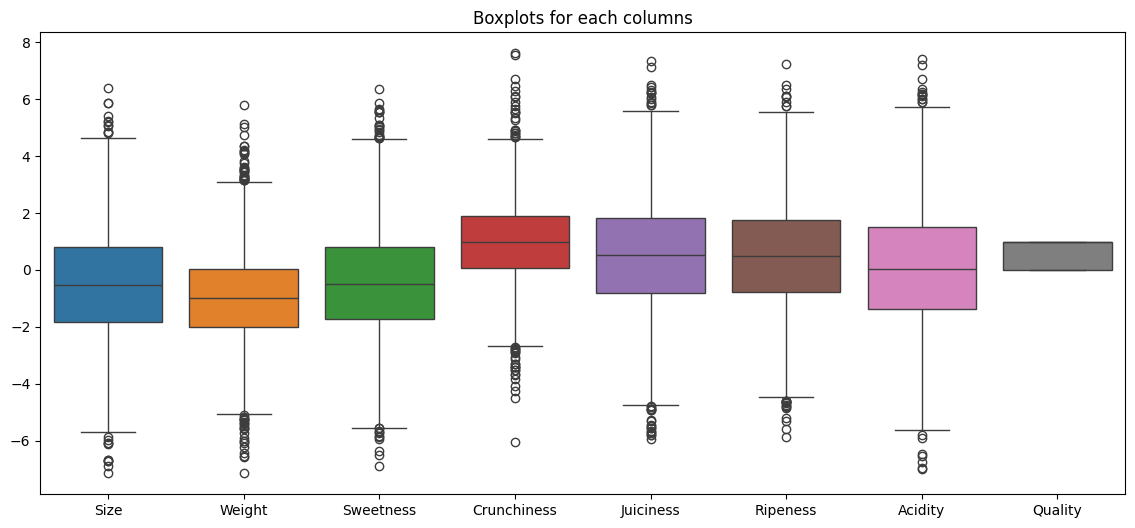

In [11]:
#Visualize columns as boxplots

plt.figure(figsize=(14, 6))
sns.boxplot(df)
plt.title("Boxplots for each columns")
plt.show()

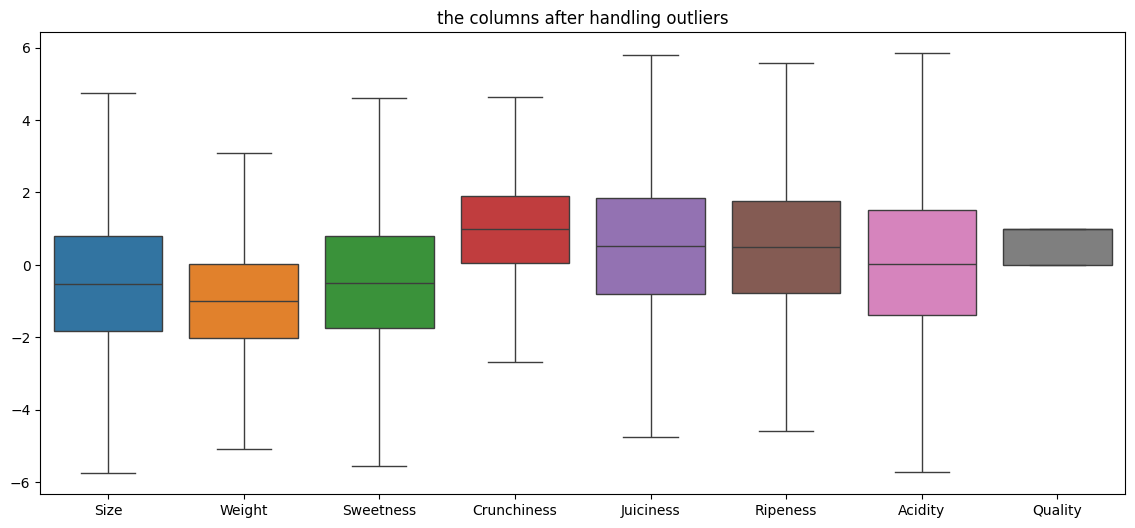

In [12]:
for col in df:
    # Calculate IQR and identify potential outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip the values to the lower and upper bounds
    clipped_values = np.clip(df[col], lower_bound, upper_bound)

    # Assign the clipped values back to the DataFrame
    df[col] = clipped_values

plt.figure(figsize=(14, 6))
sns.boxplot(data=df)
plt.title("the columns after handling outliers")
plt.show()

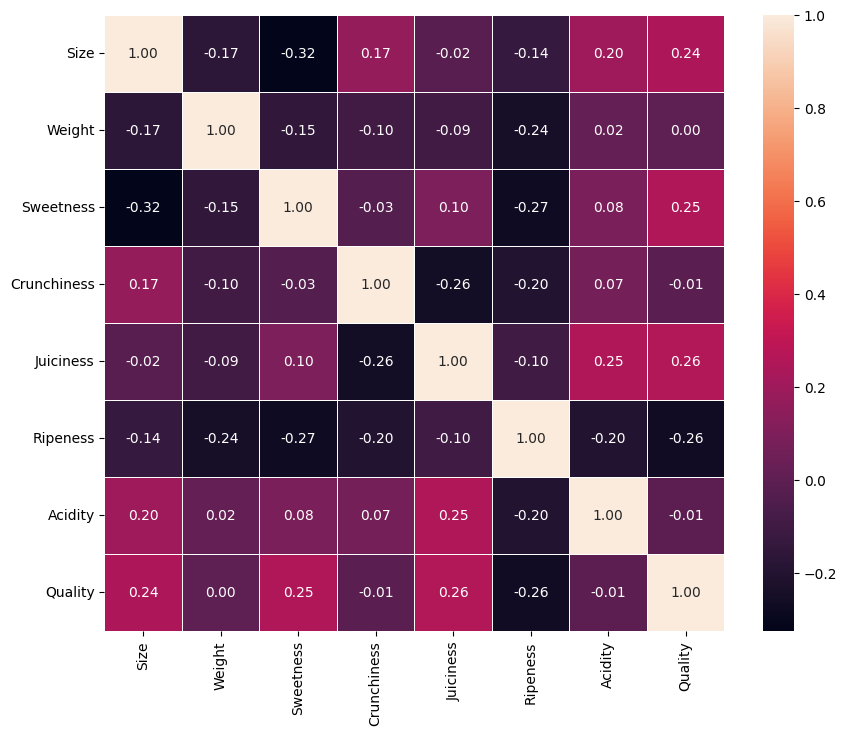

In [13]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax);


<h1> Modeling

In [14]:
X = df.drop("Quality", axis = 1)
y = df["Quality"]

In [15]:
columns = X.columns
columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

In [16]:
scaler = MinMaxScaler()
X[columns] = scaler.fit_transform(X[columns])
X.head()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity
0  0.169713  0.313739   1.000000     0.228291   0.625846  0.483507  0.451684
1  0.434256  0.273729   0.906668     0.583230   0.531846  0.536473  0.431668
2  0.520363  0.455833   0.375000     0.319665   0.720047  0.447269  0.721189
3  0.485549  0.343198   0.676465     0.353072   0.795821  0.114736  0.562691
4  0.678264  0.462524   0.508227     0.290946   0.738271  0.322577  0.537696

In [17]:
X.describe()

Size       Weight    Sweetness  Crunchiness    Juiciness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.500279     0.499898     0.499607     0.500777     0.499600   
std       0.182803     0.192696     0.190100     0.186931     0.181725   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.375000     0.375000     0.375000     0.375000     0.375000   
50%       0.499229     0.500693     0.496407     0.502696     0.501600   
75%       0.625000     0.625000     0.625000     0.625000     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Ripeness      Acidity  
count  4000.000000  4000.000000  
mean      0.500082     0.500875  
std       0.183875     0.181917  
min       0.000000     0.000000  
25%       0.375000     0.375000  
50%       0.500609     0.496197  
75%       0.625000     0.625000  
max       1.000000     1.000000

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = .2, random_state=42)

In [19]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()

In [20]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)

GaussianNB()

<h1> Accuracy Evaluation

In [21]:
print("Training Accuracy: \n" \
    f"Logistic Regression Accuracy {lr.score(X_train,y_train)*100}% \n" \
    f"Decision Tree Accuracy {dt.score(X_train,y_train)*100}% \n" \
    f"Random Forest Accuracy {rf.score(X_train,y_train)*100}% \n" \
    f"SVM Accuracy {svm.score(X_train,y_train)*100}% \n" \
    f"KNN Accuracy {knn.score(X_train,y_train)*100}% \n" \
    f"Naive Bayes Accuracy {nb.score(X_train,y_train)*100}%")

Training Accuracy: 
Logistic Regression Accuracy 74.65625% 
Decision Tree Accuracy 100.0% 
Random Forest Accuracy 100.0% 
SVM Accuracy 90.34375% 
KNN Accuracy 93.3125% 
Naive Bayes Accuracy 74.9375%


In [22]:
print("Testing Accuracy: \n" \
    f"Logistic Regression Accuracy {lr.score(X_test,y_test)*100}% \n" \
    f"Decision Tree Accuracy {dt.score(X_test,y_test)*100}% \n" \
    f"Random Forest Accuracy {rf.score(X_test,y_test)*100}% \n" \
    f"SVM Accuracy {svm.score(X_test,y_test)*100}% \n" \
    f"KNN Accuracy {knn.score(X_test,y_test)*100}% \n" \
    f"Naive Bayes Accuracy {nb.score(X_test,y_test)*100}%")

Testing Accuracy: 
Logistic Regression Accuracy 75.625% 
Decision Tree Accuracy 80.375% 
Random Forest Accuracy 91.125% 
SVM Accuracy 90.375% 
KNN Accuracy 90.25% 
Naive Bayes Accuracy 76.625%


<h2> <center>Conclusion 

| <h3>Algorithm          | <h3>Training Accuracy | <h3>Testing Accuracy |
|---------------------|-------------------|------------------|
| <h3>Logistic Regression | <h3>74.66%            | <h3>75.63%           |
| <h3>Decision Tree       | <h3>100.00%           | <h3>80.75%           |
| <h3>Random Forest       | <h3>100.00%           | <h3>90.13%           |
| <h3>SVM                 | <h3>90.34%            | <h3>90.38%           |
| <h3>KNN                 | <h3>93.31%            | <h3>90.25%           |
| <h3>Naive Bayes         | <h3>74.94%            | <h3>76.63%           |
